<a href="https://colab.research.google.com/github/vinothkumarsevugan/Machine-Learning-Projects/blob/main/Suv_Data_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# from collections import Counter
# import itertools
import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.patches as patches
import matplotlib.pyplot as plt
% matplotlib inline

In [75]:
df=pd.read_csv("/content/suv_data.csv")

In [ ]:
df


In [76]:
df=df.drop("User ID",axis=1)

In [ ]:
df

In [77]:
X=df.iloc[:,:-1]


In [ ]:
X

In [78]:
y=df.iloc[:,[3]]

In [ ]:
y

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

In [ ]:
y

In [81]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X[:,[2,3]]= st_x.fit_transform(X[:,[2,3]])    


In [85]:
X

array([[ 0.        ,  1.        , -1.78179743, -1.49004624],
       [ 0.        ,  1.        , -0.25358736, -1.46068138],
       [ 1.        ,  0.        , -1.11320552, -0.78528968],
       ...,
       [ 1.        ,  0.        ,  1.17910958, -1.46068138],
       [ 0.        ,  1.        , -0.15807423, -1.07893824],
       [ 1.        ,  0.        ,  1.08359645, -0.99084367]])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [86]:
X_train

array([[ 1.        ,  0.        ,  0.60603081, -0.9027491 ],
       [ 0.        ,  1.        , -0.54012675,  1.47580428],
       [ 1.        ,  0.        ,  0.03295203, -0.57973568],
       ...,
       [ 0.        ,  1.        , -0.15807423, -0.52100597],
       [ 1.        ,  0.        , -1.01769239, -0.46227625],
       [ 1.        ,  0.        , -1.11320552,  1.41707457]])

In [88]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, Y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [89]:
y_pred= classifier.predict(X_test)  

In [91]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [104]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
confusion_matrix(Y_test,y_pred)




array([[65,  3],
       [ 7, 25]])

In [102]:
f1_score(Y_test,classifier.predict(X_test))

0.8333333333333334

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


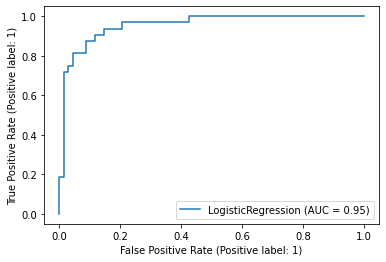

In [103]:
plot_roc_curve(classifier, X_test, Y_test)

In [106]:
classifier.coef_ ## coeff - m

array([[-0.0912354 ,  0.09130806,  2.16238702,  1.10088571]])

In [107]:
classifier.intercept_## coeff - c

array([-1.04894095])

y=1/1+e^-(-0.0912354 X1+0.09130806 X2+2.16238702 X3,  1.10088571 X4-1.04894095)
